<a href="https://colab.research.google.com/github/AngeClementAkazan/Bidirectional-LSTM-using-Keras/blob/main/BIDIRECTIONAL_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIDIRECTIONAL LSTM

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt

from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Bidirectional, LSTM
import tensorflow as tf
from tensorflow import keras
from datetime import datetime
from tensorflow.keras import layers

window_length= 14
b_size= 64
features_num=7
train_generatorp= TimeseriesGenerator(X_train,y_train,length=window_length,sampling_rate=1,batch_size=b_size)
val_generatorp= TimeseriesGenerator(X_val,y_val,length=window_length,sampling_rate=1,batch_size=b_size)
test_generatorp= TimeseriesGenerator(X_test,y_test,length=window_length,sampling_rate=1,batch_size=b_size)


In [ ]:
########################################################################################################################
#####################################    Bi-LSTM model for   Temperature prediction       ##############################
########################################################################################################################




model2= keras.Sequential()

model2.add(
    layers.Bidirectional(layers.LSTM(128, return_sequences=False), input_shape=(window_length, features_num))
)
model2.add(layers.Dense(1))
model2.summary()
# Early stopping: Model stops if the validation loss does not improve after 50 more iteration the algorithm stop
early_stopping1= tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50,mode='min')
model2.compile(loss=tf.losses.MeanSquaredError(),optimizer='adam',metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.RootMeanSquaredError()])
history2=model2.fit(train_generatorp,epochs=150,shuffle=False, validation_data=val_generator,callbacks=[early_stopping1])


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_5 (Bidirectio  (None, 256)              139264    
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                                 
Total params: 139,521
Trainable params: 139,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
26/26 [==============================] - 7s 101ms/step - loss: 0.0539 - mean_absolute_error: 0.1763 - root_mean_squared_error: 0.2321 - val_loss: 0.0369 - val_mean_absolute_error: 0.1561 - val_root_mean_squared_error: 0.1922
Epoch 2/150
26/26 [==============================] - 1s 47ms/step - loss: 0.0243 - mean_absolute_error: 0.1222 - root_mean_squared_error: 0.1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

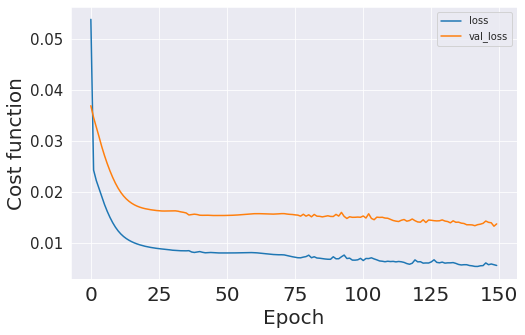

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

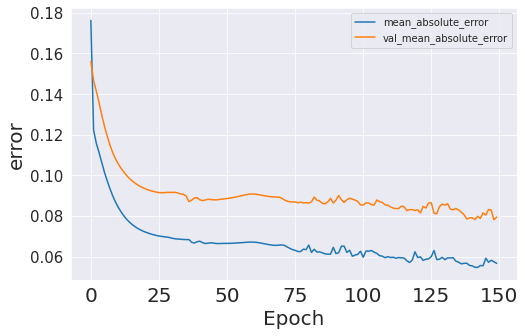

In [ ]:
##### Learning Curve #####

pd.DataFrame(history2.history)[['loss','val_loss']].plot(figsize=(8,5))
plt.ylabel("Cost function")
plt.xlabel("Epoch")
plt.savefig('Bi-LSTM_TMP_LOSS.png')
files.download("Bi-LSTM_TMP_LOSS.png")
plt.show()
pd.DataFrame(history2.history)[['mean_absolute_error','val_mean_absolute_error']].plot(figsize=(8,5))
plt.ylabel("error")
plt.xlabel("Epoch")
plt.savefig('Bi-LSTM_TMP_ERROR.png')
files.download("Bi-LSTM_TMP_ERROR.png")
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

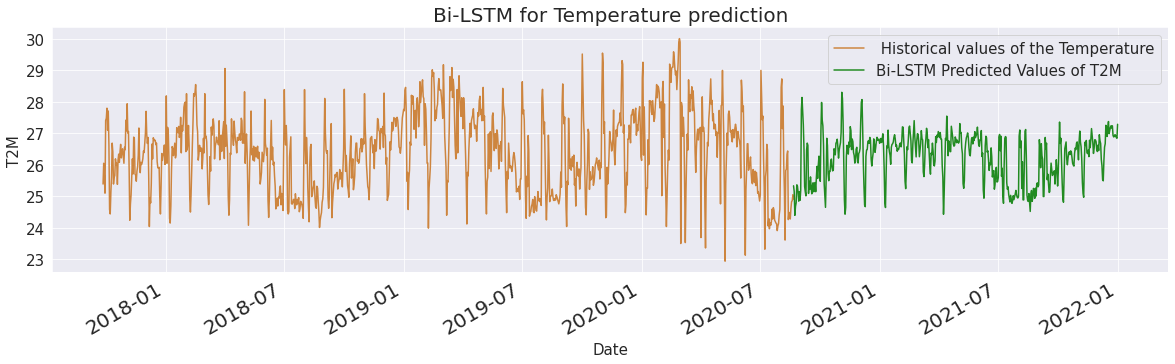

In [ ]:
# Predictions
prediction21=model2.predict_generator(test_generator)

# Consider the values of X_test by ignoring the first 14th
New_X_test2=X_test[:,1:][window_length:]

# Datapredicted
df_pred12=pd.concat([pd.DataFrame(prediction21),pd.DataFrame(New_X_test2)],axis=1)
# return the inverse transform of the MinMaxscaler created above to give the real value that we had initially
rev_trans12=scaler.inverse_transform(df_pred12)
# rev_trans1


# Extraction of T2M prediction and real values

df_final12=df_input[-prediction21.shape[0]:]
df011=df_final12['T2M']
rev022=rev_trans12[:,0]


#####  Forecast visualization  #####



Forecastb=pd.DataFrame({'Bi-LSTM Predicted Values of T2M':rev022})
Forecastb['date']=dates
Forb=Forecastb.set_index('date')
T=df_input['T2M']
D=T[0:2060].to_frame(' Historical values of the Temperature')
D['Date']=dates1
DD=D.set_index('Date')
# figsize=(35, 7)

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

# train_forecast[2000:2600].plot.line(figsize=(15, 7))
sns.set_style("darkgrid")
train_forecast = pd.concat([DD,Forb])
train_forecast[1000:2600].plot.line(figsize=(20, 5), color=['peru','forestgreen'])
plt.ylabel("T2M",fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.title('Bi-LSTM for Temperature prediction')
# train_forecast.plot.line(figsize=(35, 7))
plt.legend(fontsize=15)
plt.savefig('LSTM_TMP_PRED.png')
files.download("LSTM_TMP_PRED.png")
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

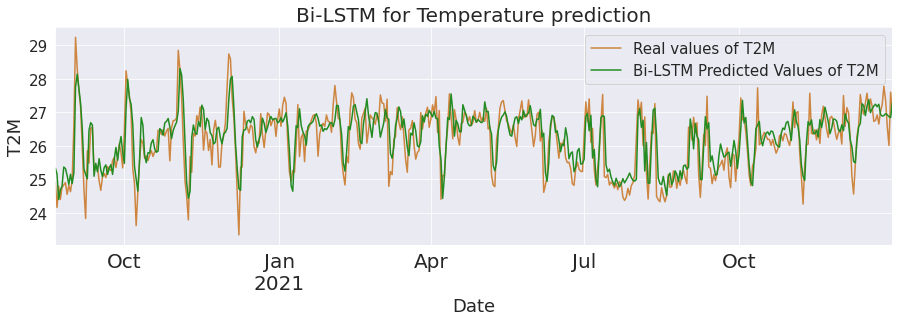

In [ ]:
##### Comparison plot #####

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

sns.set_style("darkgrid")
Forecastb1=pd.DataFrame({'Real values of T2M':df011, 'Bi-LSTM Predicted Values of T2M':rev022})
Forecastb1['date']=dates
Forb1=Forecastb1.set_index('date')
Forb1.plot.line(figsize=(15, 4),color=['peru','forestgreen'])
plt.ylabel("T2M",fontsize=18)
plt.xlabel("Date",fontsize=18)
plt.title('Bi-LSTM for Temperature prediction')
plt.legend(fontsize=15)
plt.savefig('LSTM_TMP_PREDx.png')
files.download("LSTM_TMP_PREDx.png")
plt.show()



In [ ]:
# Performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error
mse1 = mean_squared_error(df011, rev022)
r2_1 = r2_score(df011, rev022)
mae1 = mean_absolute_error(df011, rev022)
# mae1_scaled1 = mean_absolute_error(X_test[-df_pred.shape[0]:,0], prediction[:,0])
mape1 = mean_absolute_percentage_error(df011, rev022)
print("mse=" + str(round(mse1,3)))
print("r2=" + str(round(r2_1,3)))
print("mae=" + str(round(mae1,3)))
# print("mae_scaled=" + str(round(mae1_scaled1,2)))
print("mape=" + str(round(mape1,3)))


mse=0.313
r2=0.633
mae=0.43
mape=0.017
